In [1]:
#Import libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


In [2]:
#Get MNIST data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

3


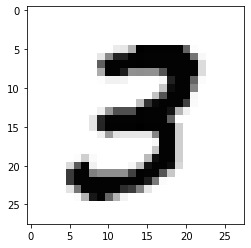

In [3]:
#Plot an example image
image_index = 7 #Can be any whole number under 60000, as there are 60000 samples
print(y_train[image_index])
plt.imshow(x_train[image_index], cmap='Greys')

In [4]:
#Reshape data to 4 dimensions (required by Keras API), normalize data
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [5]:
#Create model
model = Sequential()
model.add(Conv2D(27, (3, 3), input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2), input_shape=(26, 26, 27)))
model.add(Flatten(input_shape=(13, 13, 27)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [7]:
#Compile and train model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x=x_train, y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 18s 8ms/step - loss: 0.3724 - accuracy: 0.8890
Epoch 2/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0926 - accuracy: 0.9715
Epoch 3/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0604 - accuracy: 0.9809
Epoch 4/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0465 - accuracy: 0.9848
Epoch 5/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0345 - accuracy: 0.9887
Epoch 6/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0284 - accuracy: 0.9908
Epoch 7/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0230 - accuracy: 0.9914
Epoch 8/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0199 - accuracy: 0.9932
Epoch 9/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0189 - accuracy: 0.9933
Epoch 10/10
1875/1875 [==============================] - 18s 10ms/

In [8]:
#Evaluate model
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0586 - accuracy: 0.9840


[0.05864843726158142, 0.984000027179718]

In [9]:
#Create list of indices where prediction is wrong
pred = [out.argmax() for out in model.predict(x_test)] # [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
wrong = (y_test != pred)
wrong_idx = []
idx = 0
for i in wrong:
    if i:
        wrong_idx.append(idx)
    idx += 1

Wrong: 8
Right: 3


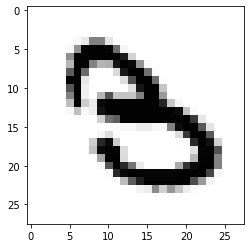

In [10]:
#Plot the wrong predictions
idx = 0
plt.imshow(x_test[wrong_idx[idx]].reshape((28, 28)), cmap='Greys')
print(f"Wrong: {model.predict(x_test[wrong_idx[idx]].reshape(1, 28, 28, 1)).argmax()}")
print(f"Right: {y_test[wrong_idx[idx]]}")